# Climate Model Common Issues
In this tutorial, we're going to highlight some of the most common issues that you could potentially encounter when running 1D climate models and what are the general recommendations to fix it! **You don't necessarily need to rerun this notebook**, this is more for you to look at to see what issues might look like in your profiles and diagnostic plots.

Now let's take a look at what weird things might happen in your climate models!

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import virga.justdoit as vj
import virga.justplotit as cldplt
jpi.output_notebook()
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
from bokeh.plotting import show, figure

Loading BokehJS ...

## Starting Too High of Radiative-Convective Boundary Guess

Now let's say you tried starting with a rc boundary guess higher up in the profile since you don't want it to be too deep in the atmosphere. If you start with a guess too high up in the atmosphere you'll notice some odd behaviours as well. This is very common in both clear and cloudy models but fortunately it's very easy to visually catch this issue majority of the time. Let's look at this with a clear atmospheric model.

In [2]:
#1 ck tables from roxana
mh = '0.0'#'+0.0' #log metallicity
CtoO = '0.46'# # CtoO absolute ratio
ck_db = os.path.join(os.getenv('picaso_refdata'),'opacities', 'preweighted', f'sonora_2121grid_feh{mh}_co{CtoO}.hdf5')

sonora_profile_db = os.path.join(os.getenv('picaso_refdata'),'sonora_grids','bobcat')

In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

teff= 200 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

opacity_ck = jdi.opannection(ck_db=ck_db, method='preweighted') # grab your opacities

In [4]:
nlevel = 91 # number of plane-parallel levels in your code

pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

Maybe you didn't want to wait forever for your model to run so you didn't want to start with a very deep `nstr_upper`, what happens if we start with a guess at let's say layer 45 (reminder in these tutorials we have 91 layers in our atmosphere)

In [5]:
rcb_guess = 45 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

In [6]:
cl_run.inputs_climate(temp_guess= temp_bobcat, pressure= pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv = rfacv)

In [7]:
out = cl_run.climate(opacity_ck, save_all_profiles=True,with_spec=True)

SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False


Iteration number  0 , min , max temp  74.36971515045234 1449.040908995524 , flux balance  1.2214583439589515
Iteration number  1 , min , max temp  73.84317082797789 1445.696306939193 , flux balance  1.192057573739551


Iteration number  2 , min , max temp  73.32021946223387 1442.351589465984 , flux balance  1.1629850770235994
Iteration number  3 , min , max temp  72.80071999902044 1439.0033538314244 , flux balance  1.1342356813093126
Iteration number  4 , min , max temp  72.28453550147024 1435.6538052957849 , flux balance  1.1058047239262279
Iteration number  5 , min , max temp  71.77153539050538 1432.3081645022633 , flux balance  1.0777124761799521
Iteration number  6 , min , max temp  71.26159853557773 1428.9575464758193 , flux balance  1.0499298371279895
Iteration number  7 , min , max temp  70.75460754225564 1425.6041875768212 , flux balance  1.0224382253210875
Iteration number  8 , min , max temp  70.25045264446808 1422.2470194353114 , flux balance  0.9952381959337488
Iteration number  9 , min , max temp  69.74902559453986 1418.888799307327 , flux balance  0.9683385829839051
Iterations exceeded it_max ! sorry 


Big iteration is  69.74902559453986 0
Iteration number  0 , min , max temp  69.25022636182105 1415.5266133971043 , flux balance  0.9417160245613219


Iteration number  1 , min , max temp  68.7539558473728 1412.160741162069 , flux balance  0.9153703945465204
Iteration number  2 , min , max temp  68.26012251203377 1408.79103779548 , flux balance  0.8893153931412473
Iteration number  3 , min , max temp  67.76863827188598 1405.4146008226762 , flux balance  0.8635291531191123
Iteration number  4 , min , max temp  67.27942020385444 1402.0325418967368 , flux balance  0.838005114606626
Iteration number  5 , min , max temp  66.79238950785697 1398.6455212205842 , flux balance  0.8127428749615836
Iteration number  6 , min , max temp  66.30747181804367 1395.2492860715697 , flux balance  0.7877081076097023
Iteration number  7 , min , max temp  65.8245961591584 1391.8424355199547 , flux balance  0.7628889458143286
Iteration number  8 , min , max temp  65.34369632558902 1388.4125482949216 , flux balance  0.7382370668523867
Iteration number  9 , min , max temp  64.86470824827424 1384.9673250614064 , flux balance  0.7137959643637839
Iterations excee

Big iteration is  64.86470824827424 1
Iteration number  0 , min , max temp  64.38757233709673 1381.5179206385635 , flux balance  0.6896188108437613


Iteration number  1 , min , max temp  63.91222988975165 1378.067625587152 , flux balance  0.6657160722128395
Iteration number  2 , min , max temp  63.43862936151107 1374.6124090780493 , flux balance  0.6420708415359337
Iteration number  3 , min , max temp  62.96671706194077 1371.1484119911845 , flux balance  0.6186812297099689
Iteration number  4 , min , max temp  62.49644586187267 1367.6806199213338 , flux balance  0.5955502783283436
Iteration number  5 , min , max temp  62.02776445511865 1364.2101499710432 , flux balance  0.5726860399698139
Iteration number  6 , min , max temp  61.56063527329869 1360.7319293951634 , flux balance  0.5500713308884085
Iteration number  7 , min , max temp  61.09501302651396 1357.2486258512918 , flux balance  0.5277049784391107
Iteration number  8 , min , max temp  60.63085751217955 1353.7620436873697 , flux balance  0.5056004785037761
Iteration number  9 , min , max temp  60.16813146715404 1350.2711566627047 , flux balance  0.4837430738628724
Iterations 

Big iteration is  60.16813146715404 2
Iteration number  0 , min , max temp  59.70679709652989 1346.7749700442932 , flux balance  0.4621274435101231
Iteration number  1 , min , max temp  59.24681954079435 1343.2747670386063 , flux balance  0.44076625240747563


Iteration number  2 , min , max temp  58.788164843573675 1339.7665800242014 , flux balance  0.41964438703060086
Iteration number  3 , min , max temp  58.33080210429522 1336.251647194339 , flux balance  0.39875578600929174
Iteration number  4 , min , max temp  57.87469781090733 1332.7307102412888 , flux balance  0.3780991018517525
Iteration number  5 , min , max temp  57.419821997815355 1329.1996826974062 , flux balance  0.3576470387300021
Iteration number  6 , min , max temp  56.96614300623714 1325.6532609887731 , flux balance  0.3373784781376541
Iteration number  7 , min , max temp  56.51363189937905 1322.0804171390241 , flux balance  0.31725484319793396
Iteration number  8 , min , max temp  56.062256604011374 1318.4830836395454 , flux balance  0.2972730602151534
Iteration number  9 , min , max temp  55.6119824776213 1314.881514087386 , flux balance  0.277524872165925
Iterations exceeded it_max ! sorry 
Big iteration is  55.6119824776213 3


Iteration number  0 , min , max temp  55.162778699764345 1311.2803490312926 , flux balance  0.2580358941533521
Iteration number  1 , min , max temp  54.7146138043884 1307.6746567924247 , flux balance  0.2387966431732156
Iteration number  2 , min , max temp  54.26745662449857 1304.0652578370828 , flux balance  0.2198027343306504
Iteration number  3 , min , max temp  53.821274794750344 1300.4573367994872 , flux balance  0.20106276093103204
Iteration number  4 , min , max temp  53.376037445346896 1296.8422264773421 , flux balance  0.18255552788449575
Iteration number  5 , min , max temp  52.93170826462843 1293.222422398687 , flux balance  0.16427440029563267
Iteration number  6 , min , max temp  52.48824605367395 1289.598630780604 , flux balance  0.14622173292045812


Iteration number  7 , min , max temp  52.04562083536518 1285.9652760063075 , flux balance  0.1283655284828942
Iteration number  8 , min , max temp  51.60378183799441 1282.3203059305508 , flux balance  0.11069554436411988
Iteration number  9 , min , max temp  51.1626698952845 1278.6602610643279 , flux balance  0.09320534580567225
Iterations exceeded it_max ! sorry 
Big iteration is  51.1626698952845 4


Iteration number  0 , min , max temp  50.72221375136998 1274.978409439989 , flux balance  0.07586635483005846
Iteration number  1 , min , max temp  50.28231209266816 1271.2707783988167 , flux balance  0.058649716251124515
Iteration number  2 , min , max temp  49.8428151171417 1267.5246902150313 , flux balance  0.04149971037380213
Iteration number  3 , min , max temp  49.40346565006785 1263.719189246155 , flux balance  0.024322420893917777
Iteration number  4 , min , max temp  48.96369411241415 1259.7959365012662 , flux balance  0.006896915973326318
Iteration number  5 , min , max temp  48.81700659674346 1258.380412141197 , flux balance  0.0006657773633195882
In t_start: Converged Solution in iterations  5
Profile converged before itmx


Iteration number  0 , min , max temp  48.805240894773526 1251.9403625903706 , flux balance  0.22741059930595994
Iteration number  1 , min , max temp  48.78742375360929 1245.541363344787 , flux balance  0.1915816271223012
Iteration number  2 , min , max temp  48.76337536232073 1239.1815481835197 , flux balance  0.1568972692069205
Iteration number  3 , min , max temp  48.7327610717504 1232.859932224555 , flux balance  0.12332584307313837
Iteration number  4 , min , max temp  48.69499228679748 1226.582983403082 , flux balance  0.09084619727427451
Iteration number  5 , min , max temp  48.648961919301385 1220.3537697577372 , flux balance  0.05942805434835935
Iteration number  6 , min , max temp  48.592333467358756 1214.171638944584 , flux balance  0.029068452218509115
Iterations exceeded it_max ! sorry 
Big iteration is  48.592333467358756 0


Iteration number  0 , min , max temp  48.526719594168455 1208.7841109593232 , flux balance  0.003246341782548603
Iteration number  1 , min , max temp  48.50746812729062 1208.1682283558785 , flux balance  0.0003311505578651232
In t_start: Converged Solution in iterations  1
Profile converged before itmx


final [0, 45, 89, 0, 0, 0]


Iteration number  0 , min , max temp  48.61681944685473 1196.9179775678735 , flux balance  0.007620026438632589
Iteration number  1 , min , max temp  48.584442557608526 1195.4951530825451 , flux balance  0.0007266065406982025
In t_start: Converged Solution in iterations  1
Big iteration is  48.584442557608526 0


Iteration number  0 , min , max temp  48.57898465762646 1195.3589555051499 , flux balance  6.745565399212898e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


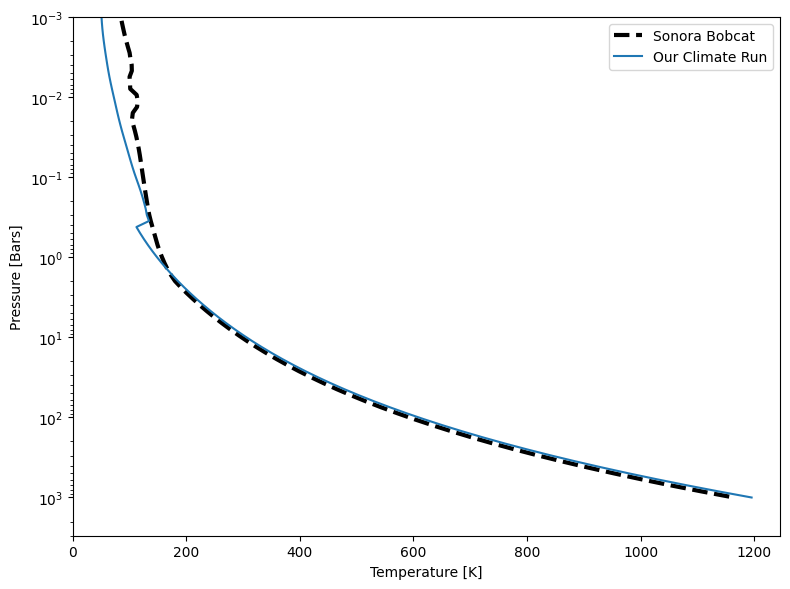

In [8]:
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")

plt.semilogy(out['temperature'],out['pressure'],label="Our Climate Run")

plt.legend()
plt.tight_layout()
plt.show()

So as you can see here there's this large jump in the PT profile where the profile is following the adiabat too far up. This is a clear visual clue that you need to start with a deeper `nstr_upper` initial guess, even though it says this climate model ended up converging.

Sometimes it's not as visually noticeable as this so a good way to tell if these models are good or not is by looking at dT/dP

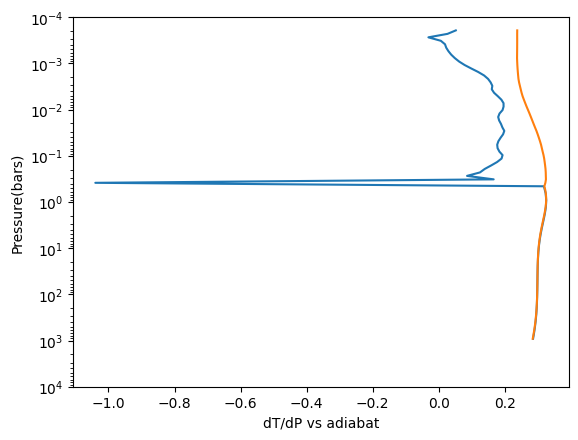

In [9]:
cp, grad, dtdp, layer_p= jpi.pt_adiabat(out,cl_run,opacity_ck)

So here in this case, you can see that dT/dP actually goes super negative. Anytime you see these going really far negative, it usually points to a poorly converged model.

Sometimes if you start way too high, the convective zone will reach the top of the atmosphere, PICASO will send you an error and the run will fail if that occurs.

**Recommendation**:
Generally, a conservative starting rc boundary guess is 83 (if doing 91 levels). The actual layer of where the rc boundary is going to vary depending on the surface gravity, whether there are clouds or not, the temperature of the object, etc.

### Solution:

Now let's fix this by running a case where we have a better rc boundary guess that isn't too high and we can see what good diagnostic plots should look like

In [10]:
#1 ck tables from roxana
mh = '0.0'#'+0.0' #log metallicity
CtoO = '0.46'# # CtoO absolute ratio
ck_db = os.path.join(os.getenv('picaso_refdata'),'opacities', 'preweighted', f'sonora_2121grid_feh{mh}_co{CtoO}.hdf5')

In [11]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation

teff= 200 # Effective Temperature of your Brown Dwarf in K
grav = 1000 # Gravity of your brown dwarf in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(teff) # input effective temperature

opacity_ck = jdi.opannection(ck_db=ck_db, method='preweighted') # grab your opacities

In [12]:
nlevel = 91 # number of plane-parallel levels in your code

pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

In [13]:
rcb_guess = 60 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

In [14]:
cl_run.inputs_climate(temp_guess= temp_bobcat, pressure= pressure_bobcat,
                      rcb_guess=rcb_guess, rfacv = rfacv)

In [15]:
out = cl_run.climate(opacity_ck, save_all_profiles=True,with_spec=True)

SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False


Iteration number  0 , min , max temp  74.19745294899792 1165.1815323227827 , flux balance  -0.03198158238890853
Iteration number  1 , min , max temp  73.50018998211978 1166.4451064621196 , flux balance  -0.031048848360079703
Iteration number  2 , min , max temp  72.80783649038005 1167.6840928675692 , flux balance  -0.030126662414299562
Iteration number  3 , min , max temp  72.12003394156734 1168.8992214785933 , flux balance  -0.029214750362719425
Iteration number  4 , min , max temp  71.43644041609366 1170.0911805737765 , flux balance  -0.02831285248562798
Iteration number  5 , min , max temp  70.75673020995596 1171.2606188860989 , flux balance  -0.027420723025076373


Iteration number  6 , min , max temp  70.08059130858058 1172.4081474947645 , flux balance  -0.026538129755082438
Iteration number  7 , min , max temp  69.40772629035747 1173.5358917672775 , flux balance  -0.025660661211094473
Iteration number  8 , min , max temp  68.73785334722194 1174.6421224686558 , flux balance  -0.02479182139759127
Iteration number  9 , min , max temp  68.0707042033802 1175.7280500484019 , flux balance  -0.02393173873986052
Iterations exceeded it_max ! sorry 
Big iteration is  68.0707042033802 0


Iteration number  0 , min , max temp  67.40602411091515 1176.7943252214932 , flux balance  -0.023080222088063634
Iteration number  1 , min , max temp  66.74357024110479 1177.8413074580012 , flux balance  -0.0222371566117834
Iteration number  2 , min , max temp  66.0831100131618 1178.8693601253183 , flux balance  -0.02140242728437849
Iteration number  3 , min , max temp  65.42442492089528 1179.8788696116026 , flux balance  -0.02057591296679159
Iteration number  4 , min , max temp  64.76730067055422 1180.869595444586 , flux balance  -0.019757501780778244
Iteration number  5 , min , max temp  64.11153637651977 1181.8418073889702 , flux balance  -0.01894709051119125
Iteration number  6 , min , max temp  63.456937959659804 1182.7965104390855 , flux balance  -0.01814458408534685


Iteration number  7 , min , max temp  62.80331881697247 1183.7350964988275 , flux balance  -0.017346941037603602
Iteration number  8 , min , max temp  62.15050088151728 1184.6570140668919 , flux balance  -0.016556315486128327
Iteration number  9 , min , max temp  61.498310362210546 1185.5621612591353 , flux balance  -0.01577359780148853
Iterations exceeded it_max ! sorry 
Profile converged before itmx


Iteration number  0 , min , max temp  60.83877266331602 1186.7840759701219 , flux balance  -0.035690956744818376
Iteration number  1 , min , max temp  60.17991540881012 1187.9829250443177 , flux balance  -0.03376771613992736
Iteration number  2 , min , max temp  59.521591264297335 1189.1581379098254 , flux balance  -0.03186704812171792
Iteration number  3 , min , max temp  58.86365052032166 1190.3106195357718 , flux balance  -0.029988844898814565
Iteration number  4 , min , max temp  58.20595515428277 1191.441077740793 , flux balance  -0.028133015258969437
Iteration number  5 , min , max temp  57.54836365715419 1192.54983513919 , flux balance  -0.026299484126899274
Iteration number  6 , min , max temp  56.89073857409348 1193.6371580917723 , flux balance  -0.02448818853786776
Iterations exceeded it_max ! sorry 
Big iteration is  56.89073857409348 0


Iteration number  0 , min , max temp  56.23294274655143 1194.7032873441087 , flux balance  -0.022699073787707198
Iteration number  1 , min , max temp  55.574834221657625 1195.74954146315 , flux balance  -0.020929325836251247
Iteration number  2 , min , max temp  54.91627470172721 1196.775141155045 , flux balance  -0.01918140279820896
Iteration number  3 , min , max temp  54.25711642349664 1197.7800195825198 , flux balance  -0.017455857497934265
Iteration number  4 , min , max temp  53.597201925199656 1198.7643138076805 , flux balance  -0.015752633717906136
Iteration number  5 , min , max temp  52.936365395975685 1199.7281327743117 , flux balance  -0.014071651883858829
Iteration number  6 , min , max temp  52.27442102116803 1200.6715546263995 , flux balance  -0.01241279337790353
Iterations exceeded it_max ! sorry 
Profile converged before itmx
Move up two levels


Iteration number  0 , min , max temp  51.76754484294408 1137.4416565301754 , flux balance  -0.12490786252485016
Iteration number  1 , min , max temp  51.25273339602567 1143.470148413673 , flux balance  -0.1026179520571798
Iteration number  2 , min , max temp  50.73041716273602 1149.3205210082579 , flux balance  -0.08035139436799175
Iteration number  3 , min , max temp  50.20103487095991 1155.0024794693843 , flux balance  -0.05811555819734882
Iteration number  4 , min , max temp  49.66490117281755 1160.5183304386464 , flux balance  -0.03593053464642449
Iteration number  5 , min , max temp  49.122364083640775 1165.8722120445718 , flux balance  -0.013764985077540244
Iteration number  6 , min , max temp  48.7992899621209 1168.9420454021601 , flux balance  -0.0006879944493032829


Iteration number  7 , min , max temp  48.78795287518454 1169.0771039468168 , flux balance  -3.62354125852377e-05
In t_start: Converged Solution in iterations  7
Big iteration is  48.78795287518454 0
 We are already at a root, tolf , test =  5e-05 ,  3.626759290205485e-05
Profile converged before itmx


Iteration number  0 , min , max temp  49.12582219565443 1153.7217082520758 , flux balance  -0.05333297110938835
Iteration number  1 , min , max temp  49.473436919036786 1165.8875926371138 , flux balance  -0.005878150001585175
Iteration number  2 , min , max temp  49.52526666783054 1167.1864808868852 , flux balance  -0.0003423128753104067
In t_start: Converged Solution in iterations  2
Big iteration is  49.52526666783054 0


Iteration number  0 , min , max temp  49.52922857359663 1167.254837497021 , flux balance  -1.9692177821696946e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  49.65769619868203 1162.4387491730888 , flux balance  -0.01667653233865671
Iteration number  1 , min , max temp  49.7073925871236 1166.263219669773 , flux balance  -0.0010047694675522974
In t_start: Converged Solution in iterations  1
Big iteration is  49.7073925871236 0


Iteration number  0 , min , max temp  49.71557395697705 1166.4658729836128 , flux balance  -6.338542883366948e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx


Iteration number  0 , min , max temp  49.808590886304806 1167.6048376903411 , flux balance  -0.002242280871789008
Iteration number  1 , min , max temp  49.82682408513122 1168.0485723699655 , flux balance  -0.0001519605051500073
In t_start: Converged Solution in iterations  1
Big iteration is  49.82682408513122 0


Iteration number  0 , min , max temp  49.82839680589347 1168.078043720006 , flux balance  -1.0313064982433454e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx
final [0, 55, 89, 0, 0, 0]


Iteration number  0 , min , max temp  49.887232613459474 1170.515700079692 , flux balance  -0.000768054283240918
In t_start: Converged Solution in iterations  0
Big iteration is  49.887232613459474 0


Iteration number  0 , min , max temp  49.89393505676823 1170.665697627374 , flux balance  -5.160922422199994e-05
In t_start: Converged Solution in iterations  0
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


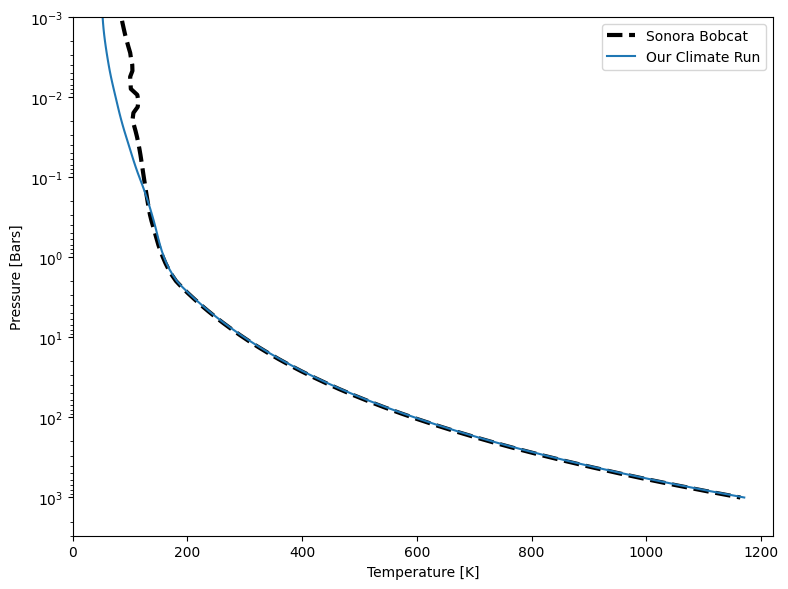

In [16]:
pressure_bobcat,temp_bobcat = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{teff}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [Bars]")
plt.xlabel('Temperature [K]')
plt.xlim(0,max(out['temperature'])+50)
plt.ylim(3e3,1e-3)

plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")

plt.semilogy(out['temperature'],out['pressure'],label="Our Climate Run")

plt.legend()
plt.tight_layout()
plt.show()

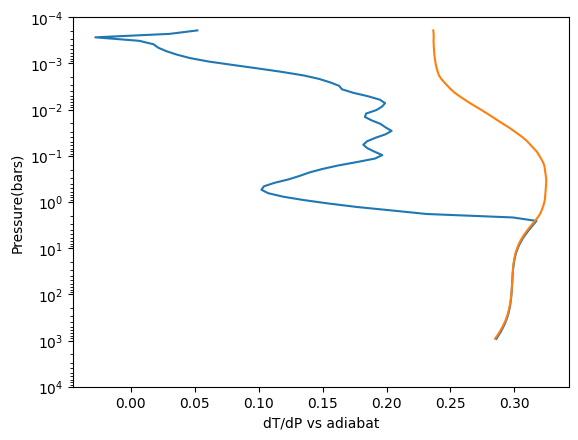

In [17]:
cp, grad, dtdp, layer_p= jpi.pt_adiabat(out,cl_run,opacity_ck)

## Checking if You Reached Radiative-Convective Equilibrium (RCE)

Another indicator, on top of the lapse rate figure, that indicates your model isn't well converged even though it says `YAY ENDING WITH CONVERGENCE` is to look at the F_{net}/F_{IR} output. This will indicate to us that your model might not be in radiative-convective equilibrium (RCE).

Let's check whether we achieved RCE in this case. In the convective regions for these climate models, the flux coming out of the convective layers should be in the IR. This isn't the case for the radiative layers. So when we look at the Fnet/F_IR plot, you should see a chair like behaviour where at the top of the atmosphere, there are low values of Fnet/F_IR (~1e-3 to 1e-5). Then, near the rc boundary, it should sharply increase since this is the beginning of the region where convection dominates.

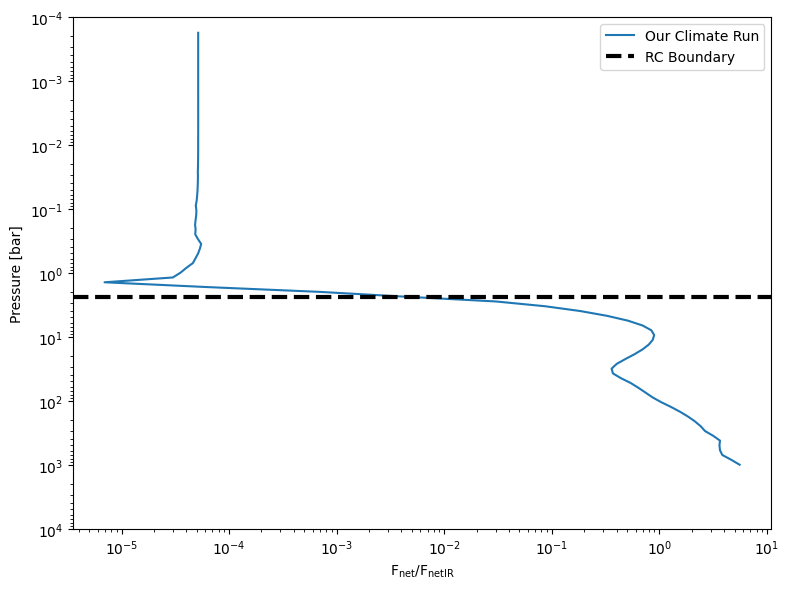

In [18]:
plt.figure(figsize=(8,6))
plt.ylabel("Pressure [bar]")
plt.xlabel(r'F$_{\rm net}$/F$_{\rm net IR}$')
plt.ylim(1e4,1e-4)

plt.loglog(abs(out['fnet/fnetir']),out['pressure'], label = "Our Climate Run")
plt.axhline(y=pressure_bobcat[out['cvz_locs'][1]],color="k",linestyle="--",linewidth=3, label = 'RC Boundary')

plt.legend()
plt.tight_layout()
plt.show()

So here we see the really nice behavior we expected in a well converged model in the Fnet/Fnet-IR diagnostic plots. Keep these two diagnostic plots in mind when running models for a sanity check!

Since you can see there's still some interesting behaviour at the top of the atmosphere both in the PT profile and the adiabat, sometimes you might have to restart with the resultant profile and start with an rc boundary guess a couple layers deeper in the atmosphere to reconverge the profile. Other things to tune within the code include the `egp_stepmax` temperature threshold, but consult with your Sonora team member to discuss this further.